# Exercise 02

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

ADF Statistic: -3.586465
p-value: 0.006025
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


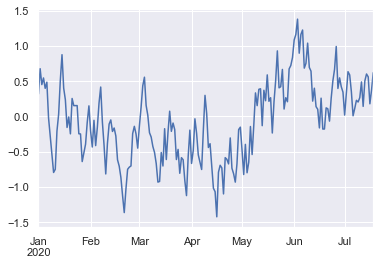

In [18]:
ts1 = ts(rho=0.9)
ts1.plot()
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [36]:
for i in range(0.5, 1.5, 0.2):
    print(i)


TypeError: 'float' object cannot be interpreted as an integer

# 02.2 Download and explore one series from google trends

In [38]:
df = pd.read_csv('C:\\Users\\MaxCalCo\\Documents\\Proyecto\\Drive\\OneDrive - Universidad de los andes\\DatosAvanzados\\DataSet\\multiTimeline.csv', skiprows=1)
df.head()

,Semana,compras: (Todo el mundo),desempleo: (Todo el mundo)
0,2015-06-21,82,13
1,2015-06-28,86,15
2,2015-07-05,80,14
3,2015-07-12,84,13
4,2015-07-19,83,12


In [39]:
df.columns = ['month', 'Compras', 'Desempleo']
df.head()

,month,Compras,Desempleo
0,2015-06-21,82,13
1,2015-06-28,86,15
2,2015-07-05,80,14
3,2015-07-12,84,13
4,2015-07-19,83,12


In [40]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

df.head()

,Compras,Desempleo
month,,
2015-06-21,82,13
2015-06-28,86,15
2015-07-05,80,14
2015-07-12,84,13
2015-07-19,83,12


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2015-06-21 to 2020-06-14
Data columns (total 2 columns):
Compras      261 non-null int64
Desempleo    261 non-null int64
dtypes: int64(2)
memory usage: 6.1 KB


Text(0.5, 0, 'Year')

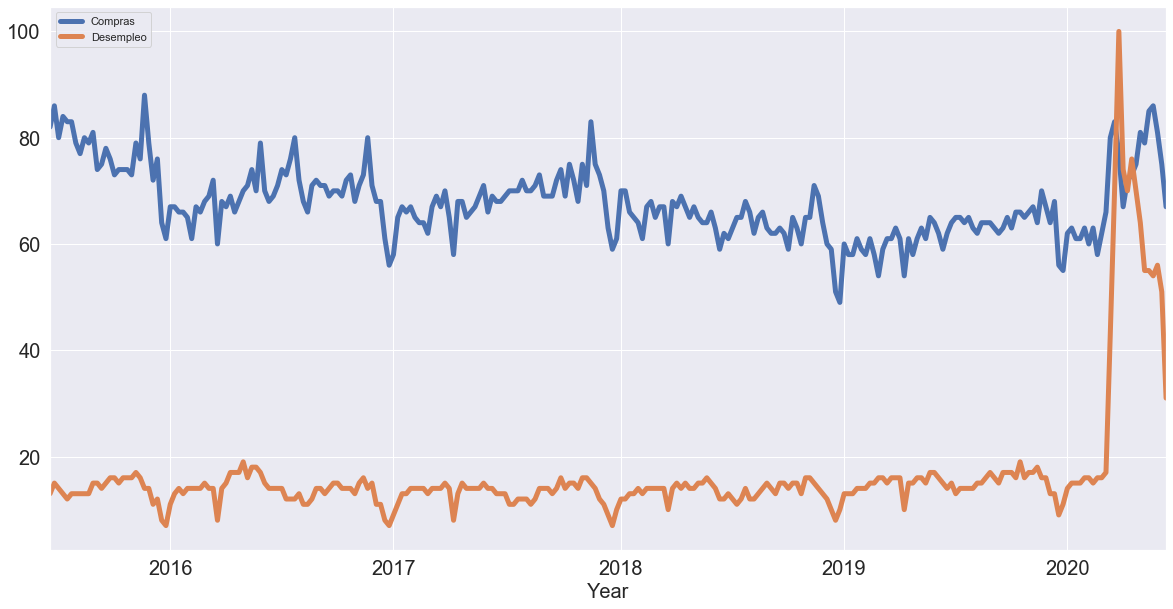

In [42]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

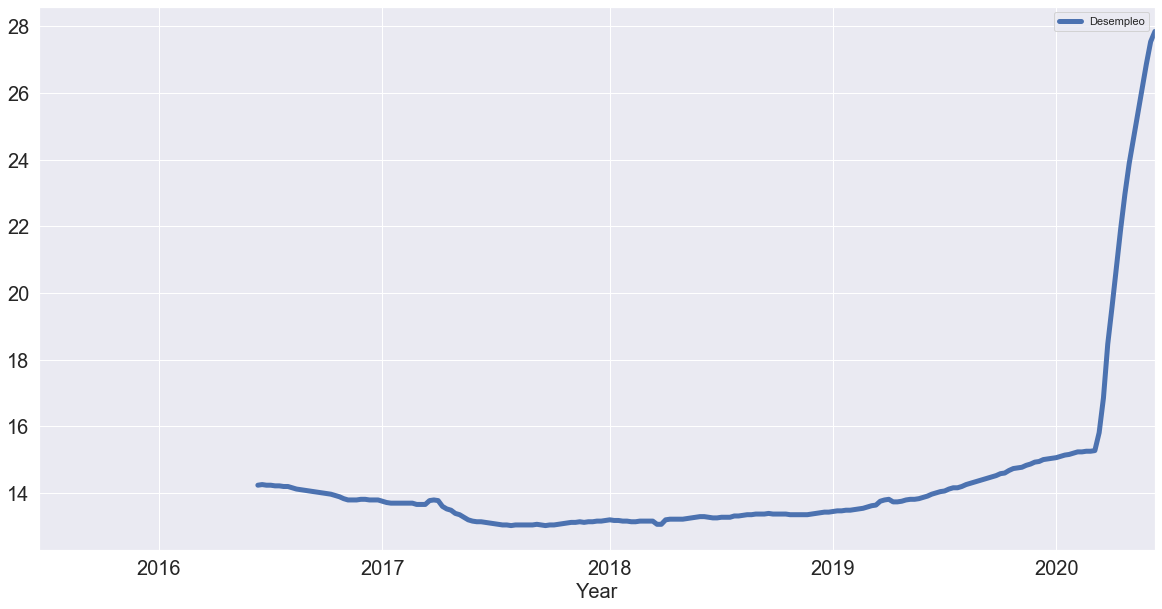

In [45]:
diet = df[['Desempleo']]
diet.rolling(52).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

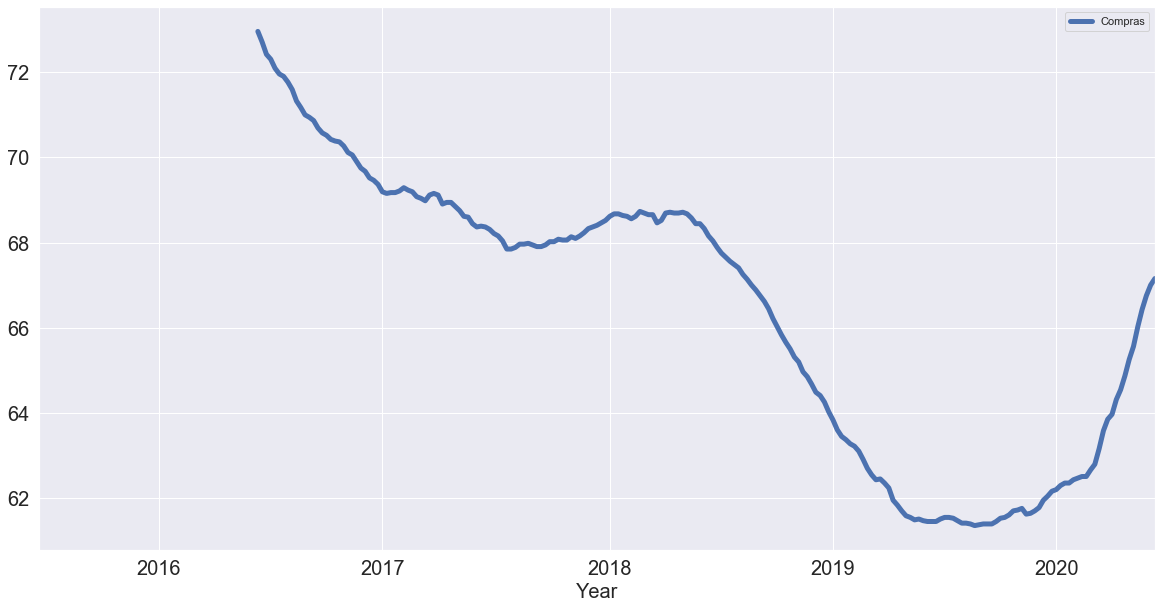

In [46]:
diet = df[['Compras']]
diet.rolling(52).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

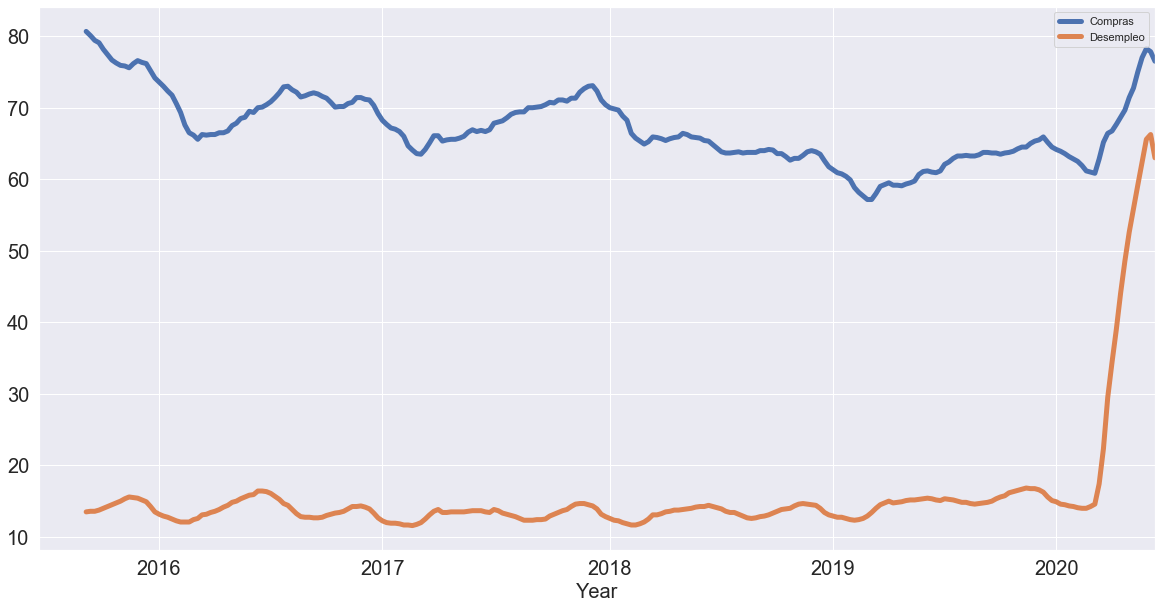

In [52]:
df[['Compras', 'Desempleo']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

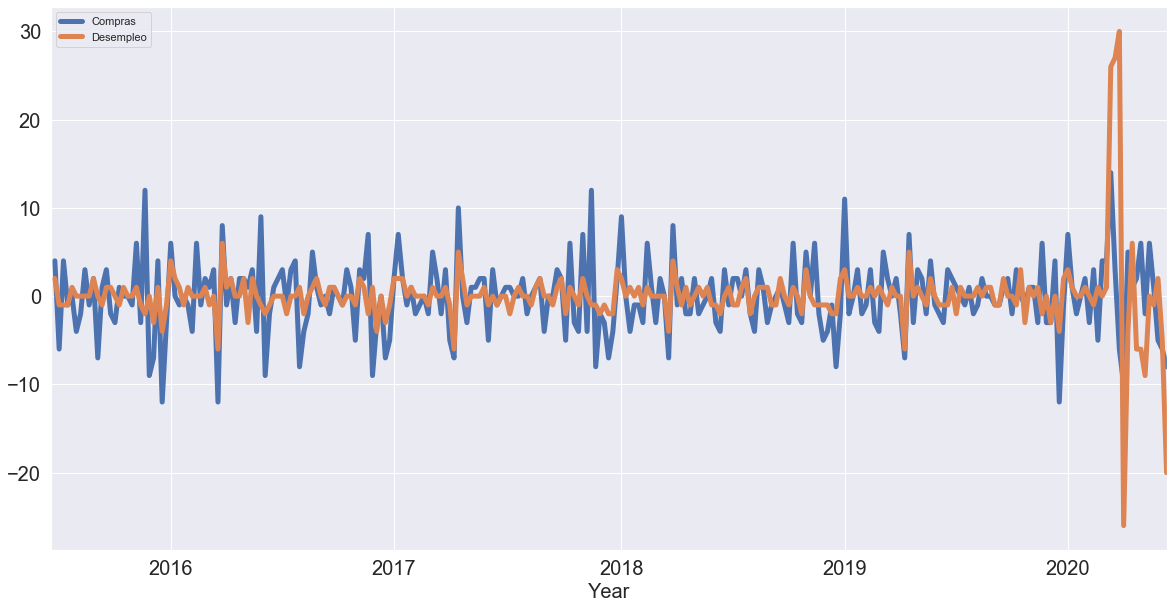

In [53]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

ADF Statistic: -0.968347
p-value: 0.764633
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


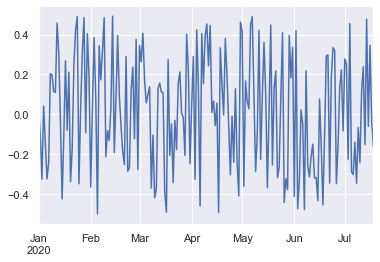

In [57]:
#Test sin Relación
ts1 = ts(rho=0)
ts1.plot()
result = adfuller(df['Desempleo'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.185362
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


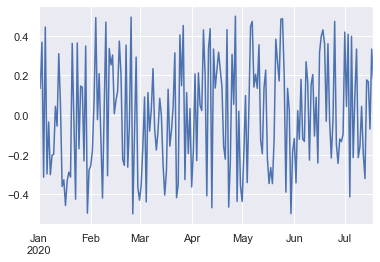

In [59]:
#Test Dickey Fuller con Relación
ts1 = ts(rho=0)
ts1.plot()
result = adfuller(df['Desempleo'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [54]:
df.diff().corr()

,Compras,Desempleo
Compras,1.000000,0.343606
Desempleo,0.343606,1.000000


In [55]:
df.corr()

,Compras,Desempleo
Compras,1.000000,0.347123
Desempleo,0.347123,1.000000
